In [2]:
import matplotlib.pyplot as plt
from cycler import cycler
from coffea import hist
import numpy as np
import mplhep


In [3]:
def plotWithRatio(
    h,
    hData,
    overlay,
    values,
    variances,
    stacked=True,
    density=False,
    lumi=59.8,
    label="CMS Preliminary",
    colors=None,
    ratioRange=[0.5, 1.5],
    xRange=None,
    yRange=None,
    logY=False,
    extraText=None,
    leg="upper right",
    binwnorm=None,
):

    # make a nice ratio plot
    plt.rcParams.update(
        {
            "font.size": 14,
            "axes.titlesize": 18,
            "axes.labelsize": 18,
            "xtick.labelsize": 12,
            "ytick.labelsize": 12,
        }
    )
    if not hData is None:
        fig, (ax, rax) = plt.subplots(
            2, 1, figsize=(7, 7), gridspec_kw={"height_ratios": (3, 1)}, sharex=True
        )
        fig.subplots_adjust(hspace=0.07)
    else:
        fig, ax = plt.subplots(
            1, 1, figsize=(7, 7)
        )  # , gridspec_kw={"height_ratios": (3, 1)}, sharex=True)

    # Here is an example of setting up a color cycler to color the various fill patches
    # http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6
    from cycler import cycler

    if not colors is None:
        if invertStack:
            _n = len(h.identifiers(overlay)) - 1
            colors = colors[_n::-1]
        ax.set_prop_cycle(cycler(color=colors))

    h.plot(
      #  overlay=overlay,
        ax=ax,
        stack=stacked,
        histtype='fill',
        binwnorm=binwnorm,
        edgecolor='black',
        linewidth=1,
    )
    
    if binwnorm:
        #[{overlay:sum}]
        mcStatUp = np.append((h.values() + np.sqrt(h.variances()))/np.diff(hData.axes[0].edges),[0])
        mcStatDo = np.append((h.values() - np.sqrt(h.variances()))/np.diff(hData.axes[0].edges),[0])
    
        uncertainty_band = ax.fill_between(
            hData.axes[0].edges,
            mcStatUp,
            mcStatDo,
            step='post',
            hatch='///',
            facecolor='none',
            edgecolor='gray',
            linewidth=0,
    )
    else:
        #[{overlay:sum}]
        mcStatUp = np.append(values + np.sqrt(variances), [0])
        mcStatDo = np.append(values - np.sqrt(variances), [0])
    
        uncertainty_band = ax.fill_between(
            hData.axes[0].edges,
            mcStatUp,
            mcStatDo,
            step='post',
            hatch='///',
            facecolor='none',
            edgecolor='gray',
            linewidth=0,
    )

    if not hData is None:
        
        if binwnorm:
            ax.errorbar(x=hData.axes[0].centers,
                        y=hData.values()/np.diff(hData.axes[0].edges),
                        yerr=np.sqrt(hData.values())/np.diff(hData.axes[0].edges),
                        color='black',
                        marker='.',
                        markersize=10,
                        linewidth=0,
                        elinewidth=0.5,
                        label="Data",
            )
        else:
            ax.errorbar(x=hData.axes[0].centers,
                        y=hData.values(),
                        yerr=np.sqrt(hData.values()),
                        color='black',
                        marker='.',
                        markersize=10,
                        linewidth=0,
                        elinewidth=1,
                        label="Data",
            )
        
    if not binwnorm is None:
        ax.set_ylabel(f"<Events/{binwnorm}>")
        if "[" in ax.get_xlabel():
            units = ax.get_xlabel().split("[")[-1].split("]")[0]
            ax.set_ylabel(f"<Events / {binwnorm} {units}>")
    else:
        ax.set_ylabel('Events')

    ax.autoscale(axis="x", tight=True)
    ax.set_ylim(0, None)

    ax.set_xlabel(None)

    if leg == "right":
        leg_anchor = (1.0, 1.0)
        leg_loc = "upper left"
    elif leg == "upper right":
        leg_anchor = (1.0, 1.0)
        leg_loc = "upper right"
    elif leg == "upper left":
        leg_anchor = (0.0, 1.0)
        leg_loc = "upper left"

    if not leg is None:
        ax.legend(bbox_to_anchor=leg_anchor, loc=leg_loc)
        
    ratio_mcStatUp = np.append(1 + np.sqrt(variances)/values,[0])
    ratio_mcStatDo = np.append(1 - np.sqrt(variances)/values,[0])
    
        
    ratio_uncertainty_band = rax.fill_between(
        hData.axes[0].edges,
        ratio_mcStatUp,
        ratio_mcStatDo,
        step='post',
        color='lightgray',
    )
        
    if not hData is None:
        
        hist_1_values, hist_2_values = hData.values(), values
    
        ratios = hist_1_values / hist_2_values
        ratio_uncert = hist.intervals.ratio_uncertainty(
            num=hist_1_values,
            denom=hist_2_values,
            uncertainty_type="poisson",
            
        )
        # ratio: plot the ratios using Matplotlib errorbar or bar
        hist.plot.plot_ratio_array(
            hData, ratios, ratio_uncert, ax=rax, uncert_draw_type='line',
        );

        rax.set_ylim(ratioRange[0], ratioRange[1])

    if logY:
        ax.set_yscale("log")
        ax.set_ylim(1, ax.get_ylim()[1] * 5)

    if not xRange is None:
        ax.set_xlim(xRange[0], xRange[1])
    if not yRange is None:
        ax.set_ylim(yRange[0], yRange[1])

    CMS = plt.text(
        0.0,
        1.0,
        r"$\bf{CMS}$ Preliminary",
        fontsize=16,
        horizontalalignment="left",
        verticalalignment="bottom",
        transform=ax.transAxes,
    )

    if not extraText is None:

        extraLabel = plt.text(
            0.02,
            0.99,
            extraText,
            fontsize=16,
            horizontalalignment="left",
            verticalalignment="top",
            transform=ax.transAxes,
        )
        ax.set_ylim(0, ax.get_ylim()[1] * 1.1)

    lumi = plt.text(
        1.0,
        1.0,
        r"%.1f fb$^{-1}$ (13 TeV)" % (lumi),
        fontsize=16,
        horizontalalignment="right",
        verticalalignment="bottom",
        transform=ax.transAxes,
    )

In [4]:
def SetRangeHist(histogram, axisName, lower_bound=None, upper_bound=None):
    old_axis = histogram.axis(axisName)
    lower_idx, upper_idx = None, None
    if not lower_bound is None:
        lower_idx = np.where(old_axis.edges() >= lower_bound)[0][0]
    if not upper_bound is None:
        upper_idx = np.where(old_axis.edges() <= upper_bound)[0][-1] + 1

    new_axis = hist.Bin(
        old_axis.name, old_axis.label, old_axis.edges()[lower_idx:upper_idx]
    )
    return histogram.rebin(axisName, new_axis)


def RebinHist(histogram, axisName, rebinN=1):
    old_axis = histogram.axis(axisName)
    new_axis = hist.Bin(old_axis.name, old_axis.label, old_axis.edges()[::rebinN])
    return histogram.rebin(axisName, new_axis)


In [5]:
import hist
from hist import Hist
import hist.intervals
import uproot

In [6]:
DY = uproot.open("/nfs_scratch/emettner/jobs/fullSet/boostedHTT_mt_2018_local_DYJets.input.root")
WJets = uproot.open("/nfs_scratch/emettner/jobs/fullSet/boostedHTT_mt_2018_local_WJets.input.root")
VV = uproot.open("/nfs_scratch/emettner/jobs/fullSet/boostedHTT_mt_2018_local_VV.input.root")
TT = uproot.open("/nfs_scratch/emettner/jobs/fullSet/boostedHTT_mt_2018_local_TT.input.root")
Data = uproot.open("/nfs_scratch/emettner/jobs/fullSet/boostedHTT_mt_2018_local_Data.input.root")

proc = {
    'DY': DY,
    'WJets': WJets,
    'VV': VV,
    'TT': TT,
    'Data': Data,
}

In [7]:
hists = {
    'DY': {},
    'WJets': {},
    'VV': {},
    'TT': {},
    'Data': {},
}
for process, name in zip(proc.values(), proc.keys()):
    for key in process.keys():
        if "/" in key:
            hists[name][key[19:-2]] = process[key].to_hist()

In [8]:
hists['Data']

{'Data_mass': Hist(Regular(30, 0, 150, name='xaxis'), storage=Double()) # Sum: 347.0,
 'Data_ss_mass': Hist(Regular(30, 0, 150, name='xaxis'), storage=Double()) # Sum: 36.0,
 'pt': Hist(Regular(30, 150, 400, name='xaxis'), storage=Double()) # Sum: 323.0,
 'ss_pt': Hist(Regular(30, 150, 400, name='xaxis'), storage=Double()) # Sum: 33.0,
 'eta': Hist(Regular(40, -4, 4, name='xaxis'), storage=Double()) # Sum: 347.0,
 'ss_eta': Hist(Regular(40, -4, 4, name='xaxis'), storage=Double()) # Sum: 36.0,
 'MuIDCorr': Hist(Regular(40, 0, 2, name='xaxis'), storage=Double()),
 'MuIsoCorr': Hist(Regular(40, 0, 2, name='xaxis'), storage=Double()),
 'MuTrg27Corr': Hist(Regular(40, 0, 2, name='xaxis'), storage=Double()) # Sum: 4.0,
 'MuTrg50Corr': Hist(Regular(40, 0, 2, name='xaxis'), storage=Double()) # Sum: 380.0,
 'puCorr': Hist(Regular(40, 0, 2, name='xaxis'), storage=Double()),
 'lepCorr': Hist(Regular(100, -2, 2, name='xaxis'), storage=Double()),
 'lumiWeight': Hist(Regular(40, -5, 5, name='xaxis')

/tmp/ipykernel_2956987/2683371441.py:143: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatUp = np.append(1 + np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:144: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatDo = np.append(1 - np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:159: RuntimeWarning: invalid value encountered in divide
  ratios = hist_1_values / hist_2_values


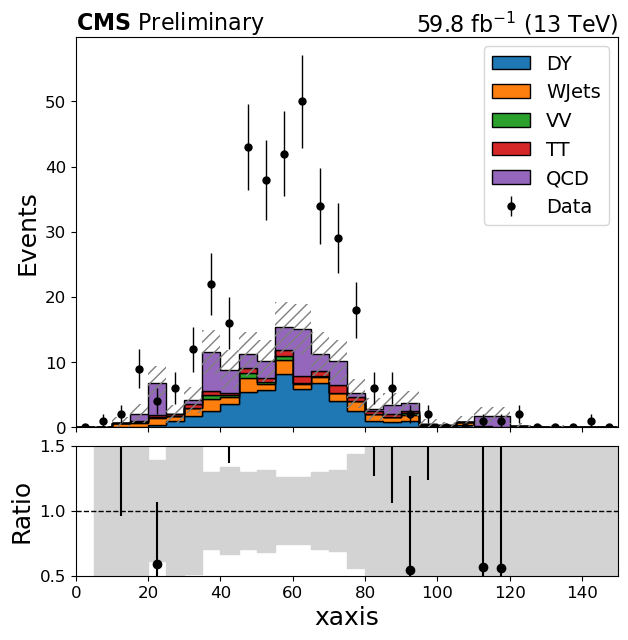

In [9]:
QCDScaleFactor = 1.6996559936491136
ss_massDict = {'DY': hists['DY']['DYJets_ss_mass'], 'WJets': hists['WJets']['WJets_ss_mass'], 'VV': hists['VV']['VV_ss_mass'], 'TT': hists['TT']['TT_ss_mass'],}
QCD_hist = hists['Data']['Data_ss_mass'] - ss_massDict['DY'] - ss_massDict['WJets'] - ss_massDict['VV'] - ss_massDict['TT']
QCD_hist = QCD_hist * QCDScaleFactor
for index in range(0,30):
    if QCD_hist[index] < 0:
        QCD_hist[index] = 0.0
massDict = {'DY': hists['DY']['DYJets_mass'], 'WJets': hists['WJets']['WJets_mass'], 'VV': hists['VV']['VV_mass'], 'TT': hists['TT']['TT_mass'], 'QCD': Hist(QCD_hist)}
massStack = hist.Stack.from_dict(massDict)
values = massDict['DY'].values() + massDict['WJets'].values() + massDict['VV'].values() + massDict['TT'].values() + QCD_hist.values()
variances = massDict['DY'].variances() + massDict['WJets'].variances() + massDict['VV'].variances() + massDict['TT'].variances() + QCD_hist.values()
massHist = plotWithRatio(massStack, hists['Data']['Data_mass'], overlay='dataset', values=values, variances=variances)

/tmp/ipykernel_2956987/2683371441.py:143: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatUp = np.append(1 + np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:144: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatDo = np.append(1 - np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:159: RuntimeWarning: invalid value encountered in divide
  ratios = hist_1_values / hist_2_values


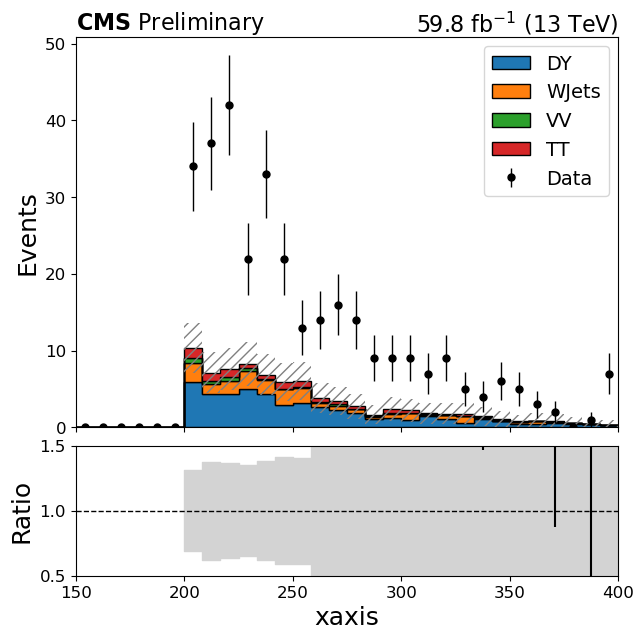

In [10]:
ptDict = {'DY': hists['DY']['pt'], 'WJets': hists['WJets']['pt'], 'VV': hists['VV']['pt'], 'TT': hists['TT']['pt'],}
ptStack = hist.Stack.from_dict(ptDict)
values = ptDict['DY'].values() + ptDict['WJets'].values() + ptDict['VV'].values() + ptDict['TT'].values()
variances = ptDict['DY'].variances() + ptDict['WJets'].variances() + ptDict['VV'].variances() + ptDict['TT'].variances()
ptHist = plotWithRatio(ptStack, hists['Data']['pt'], overlay='dataset', values=values, variances=variances)

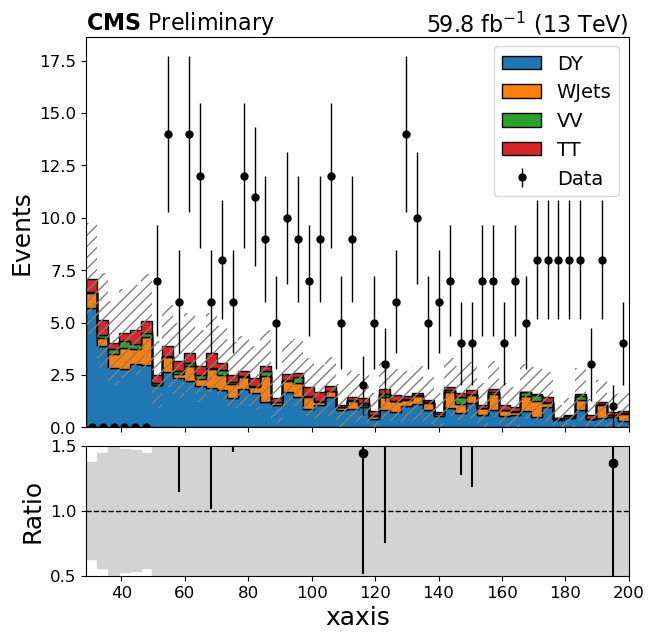

In [11]:
ptDict = {'DY': hists['DY']['muPt'], 'WJets': hists['WJets']['muPt'], 'VV': hists['VV']['muPt'], 'TT': hists['TT']['muPt'],}
ptStack = hist.Stack.from_dict(ptDict)
values = ptDict['DY'].values() + ptDict['WJets'].values() + ptDict['VV'].values() + ptDict['TT'].values()
variances = ptDict['DY'].variances() + ptDict['WJets'].variances() + ptDict['VV'].variances() + ptDict['TT'].variances()
ptHist = plotWithRatio(ptStack, hists['Data']['muPt'], overlay='dataset', values=values, variances=variances)

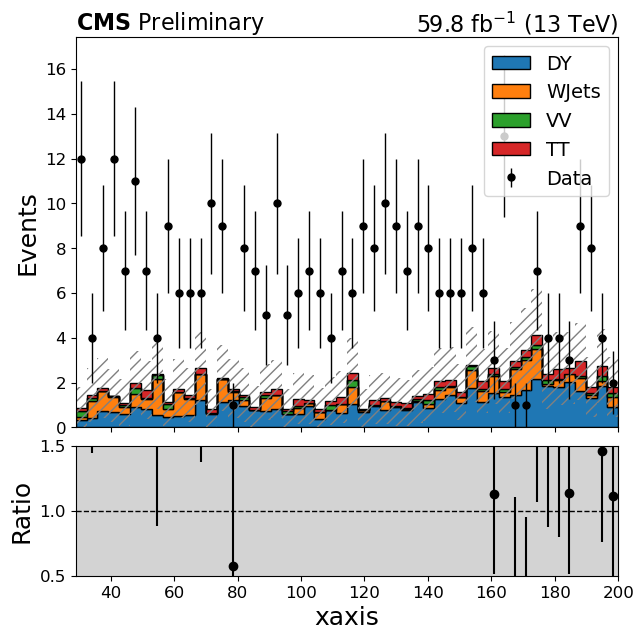

In [12]:
ptDict = {'DY': hists['DY']['tauPt'], 'WJets': hists['WJets']['tauPt'], 'VV': hists['VV']['tauPt'], 'TT': hists['TT']['tauPt'],}
ptStack = hist.Stack.from_dict(ptDict)
values = ptDict['DY'].values() + ptDict['WJets'].values() + ptDict['VV'].values() + ptDict['TT'].values()
variances = ptDict['DY'].variances() + ptDict['WJets'].variances() + ptDict['VV'].variances() + ptDict['TT'].variances()
ptHist = plotWithRatio(ptStack, hists['Data']['tauPt'], overlay='dataset', values=values, variances=variances)

/tmp/ipykernel_2956987/2683371441.py:143: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatUp = np.append(1 + np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:144: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatDo = np.append(1 - np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:159: RuntimeWarning: invalid value encountered in divide
  ratios = hist_1_values / hist_2_values


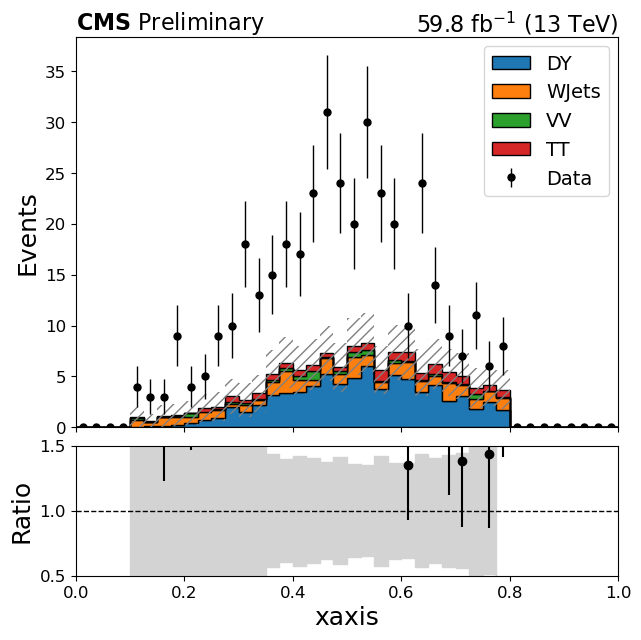

In [13]:
drDict = {'DY': hists['DY']['dr'], 'WJets': hists['WJets']['dr'], 'VV': hists['VV']['dr'], 'TT': hists['TT']['dr'],}
drStack = hist.Stack.from_dict(drDict)
values = drDict['DY'].values() + drDict['WJets'].values() + drDict['VV'].values() + drDict['TT'].values()
variances = drDict['DY'].variances() + drDict['WJets'].variances() + drDict['VV'].variances() + drDict['TT'].variances()
drHist = plotWithRatio(drStack, hists['Data']['dr'], overlay='dataset', values=values, variances=variances)

/tmp/ipykernel_2956987/2683371441.py:143: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatUp = np.append(1 + np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:144: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatDo = np.append(1 - np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:159: RuntimeWarning: invalid value encountered in divide
  ratios = hist_1_values / hist_2_values


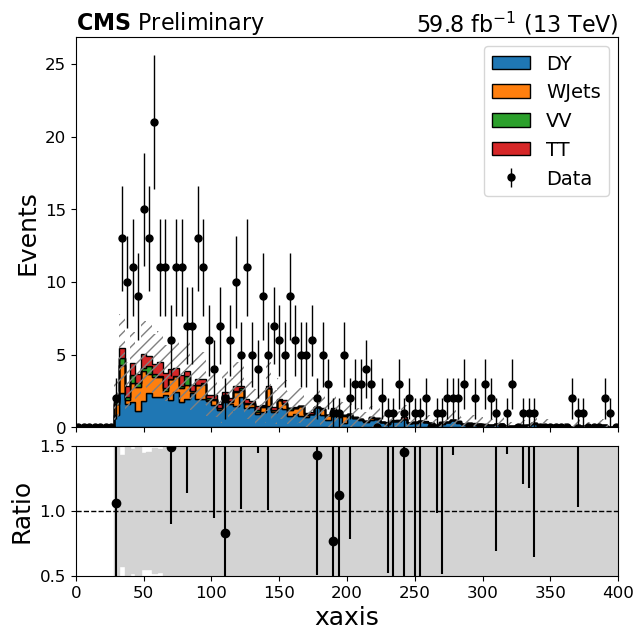

In [14]:
ptDict = {'DY': hists['DY']['MET'], 'WJets': hists['WJets']['MET'], 'VV': hists['VV']['MET'], 'TT': hists['TT']['MET'],}
ptStack = hist.Stack.from_dict(ptDict)
values = ptDict['DY'].values() + ptDict['WJets'].values() + ptDict['VV'].values() + ptDict['TT'].values()
variances = ptDict['DY'].variances() + ptDict['WJets'].variances() + ptDict['VV'].variances() + ptDict['TT'].variances()
ptHist = plotWithRatio(ptStack, hists['Data']['MET'], overlay='dataset', values=values, variances=variances)

/tmp/ipykernel_2956987/2683371441.py:143: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatUp = np.append(1 + np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:144: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatDo = np.append(1 - np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:159: RuntimeWarning: invalid value encountered in divide
  ratios = hist_1_values / hist_2_values


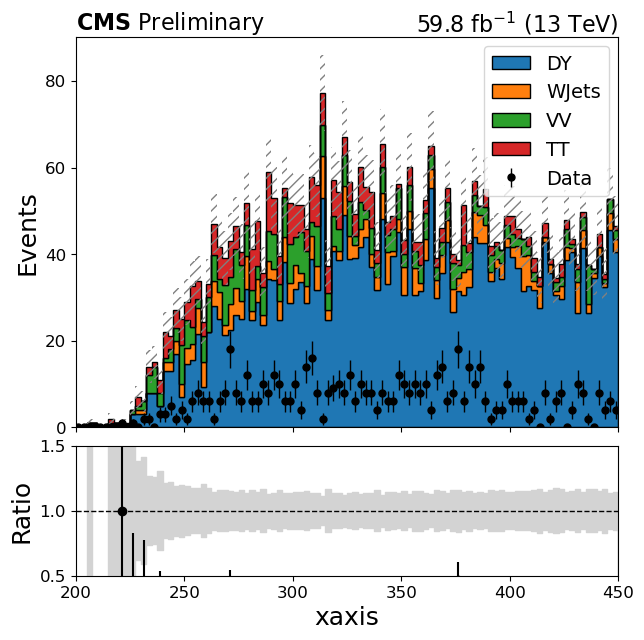

In [15]:
ptDict = {'DY': hists['DY']['HiggsPt'], 'WJets': hists['WJets']['HiggsPt'], 'VV': hists['VV']['HiggsPt'], 'TT': hists['TT']['HiggsPt'],}
ptStack = hist.Stack.from_dict(ptDict)
values = ptDict['DY'].values() + ptDict['WJets'].values() + ptDict['VV'].values() + ptDict['TT'].values()
variances = ptDict['DY'].variances() + ptDict['WJets'].variances() + ptDict['VV'].variances() + ptDict['TT'].variances()
ptHist = plotWithRatio(ptStack, hists['Data']['HiggsPt'], overlay='dataset', values=values, variances=variances)

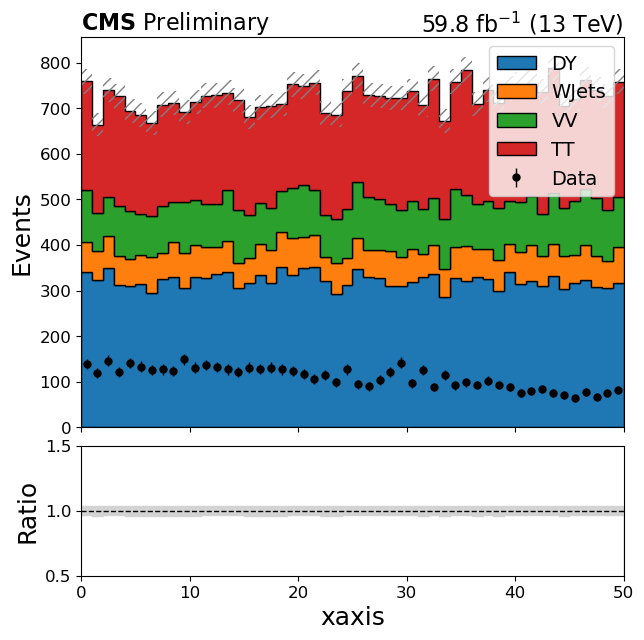

In [16]:
ptDict = {'DY': hists['DY']['tmass'], 'WJets': hists['WJets']['tmass'], 'VV': hists['VV']['tmass'], 'TT': hists['TT']['tmass'],}
ptStack = hist.Stack.from_dict(ptDict)
values = ptDict['DY'].values() + ptDict['WJets'].values() + ptDict['VV'].values() + ptDict['TT'].values()
variances = ptDict['DY'].variances() + ptDict['WJets'].variances() + ptDict['VV'].variances() + ptDict['TT'].variances()
ptHist = plotWithRatio(ptStack, hists['Data']['tmass'], overlay='dataset', values=values, variances=variances)

/tmp/ipykernel_2956987/2683371441.py:143: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatUp = np.append(1 + np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:144: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatDo = np.append(1 - np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:159: RuntimeWarning: invalid value encountered in divide
  ratios = hist_1_values / hist_2_values


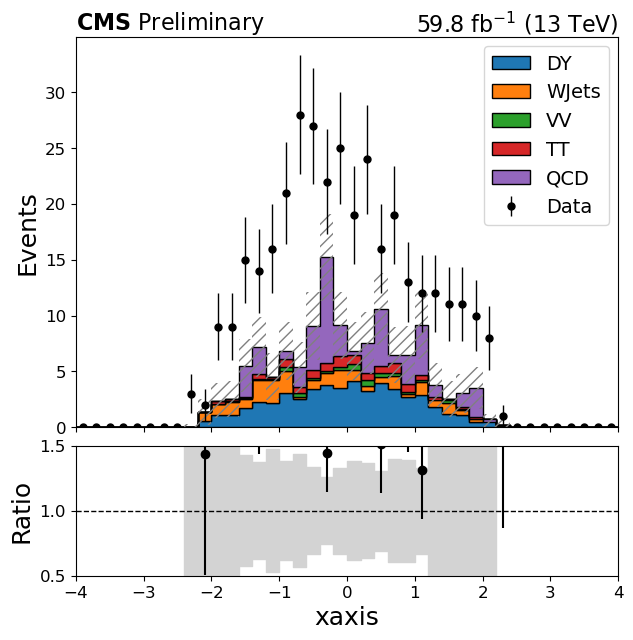

In [17]:
QCDScaleFactor = 1.6996559936491136
ss_massDict = {'DY': hists['DY']['ss_eta'], 'WJets': hists['WJets']['ss_eta'], 'VV': hists['VV']['ss_eta'], 'TT': hists['TT']['ss_eta'],}
QCD_hist = hists['Data']['ss_eta'] - ss_massDict['DY'] - ss_massDict['WJets'] - ss_massDict['VV'] - ss_massDict['TT']
QCD_hist = QCD_hist * QCDScaleFactor
for index in range(0,30):
    if QCD_hist[index] < 0:
        QCD_hist[index] = 0.0
massDict = {'DY': hists['DY']['eta'], 'WJets': hists['WJets']['eta'], 'VV': hists['VV']['eta'], 'TT': hists['TT']['eta'], 'QCD': Hist(QCD_hist)}
massStack = hist.Stack.from_dict(massDict)
values = massDict['DY'].values() + massDict['WJets'].values() + massDict['VV'].values() + massDict['TT'].values() + QCD_hist.values()
variances = massDict['DY'].variances() + massDict['WJets'].variances() + massDict['VV'].variances() + massDict['TT'].variances() + QCD_hist.values()
massHist = plotWithRatio(massStack, hists['Data']['eta'], overlay='dataset', values=values, variances=variances)

In [77]:
DY = uproot.open("/nfs_scratch/emettner/jobs/fullSetDiMu/boostedHTT_mt_2018_local_DYJets.input.root")
WJets = uproot.open("/nfs_scratch/emettner/jobs/fullSetDiMu/boostedHTT_mt_2018_local_WJets.input.root")
VV = uproot.open("/nfs_scratch/emettner/jobs/fullSetDiMu/boostedHTT_mt_2018_local_VV.input.root")
TT = uproot.open("/nfs_scratch/emettner/jobs/fullSetDiMu/boostedHTT_mt_2018_local_TT.input.root")
Data = uproot.open("/nfs_scratch/emettner/jobs/fullSetDiMu/boostedHTT_mt_2018_local_Data.input.root")

proc = {
    'DY': DY,
    'WJets': WJets,
    'VV': VV,
    'TT': TT,
    'Data': Data,
}

In [78]:
hists = {
    'DY': {},
    'WJets': {},
    'VV': {},
    'TT': {},
    'Data': {},
}
for process, name in zip(proc.values(), proc.keys()):
    for key in process.keys():
        if "/" in key:
            hists[name][key[19:-2]] = process[key].to_hist()

In [79]:
hists['Data']

{'Data_mass': Hist(Regular(12, 60, 120, name='xaxis'), storage=Double()) # Sum: 5320.0,
 'Data_ss_mass': Hist(Regular(12, 60, 120, name='xaxis'), storage=Double()) # Sum: 22.0,
 'pt': Hist(Regular(60, 150, 600, name='xaxis'), storage=Double()) # Sum: 5262.0,
 'ss_pt': Hist(Regular(60, 150, 600, name='xaxis'), storage=Double()) # Sum: 22.0,
 'eta': Hist(Regular(40, -4, 4, name='xaxis'), storage=Double()) # Sum: 5320.0,
 'ss_eta': Hist(Regular(40, -4, 4, name='xaxis'), storage=Double()) # Sum: 22.0,
 'MuIDCorr': Hist(Regular(40, 0, 2, name='xaxis'), storage=Double()),
 'MuIsoCorr': Hist(Regular(40, 0, 2, name='xaxis'), storage=Double()),
 'puCorr': Hist(Regular(40, 0, 2, name='xaxis'), storage=Double()),
 'lepCorr': Hist(Regular(100, -2, 2, name='xaxis'), storage=Double()),
 'lumiWeight': Hist(Regular(40, -5, 5, name='xaxis'), storage=Double()),
 'dr': Hist(Regular(40, 0, 1, name='xaxis'), storage=Double()) # Sum: 6096.0,
 'subMuPt': Hist(Regular(50, 0, 400, name='xaxis'), storage=Double

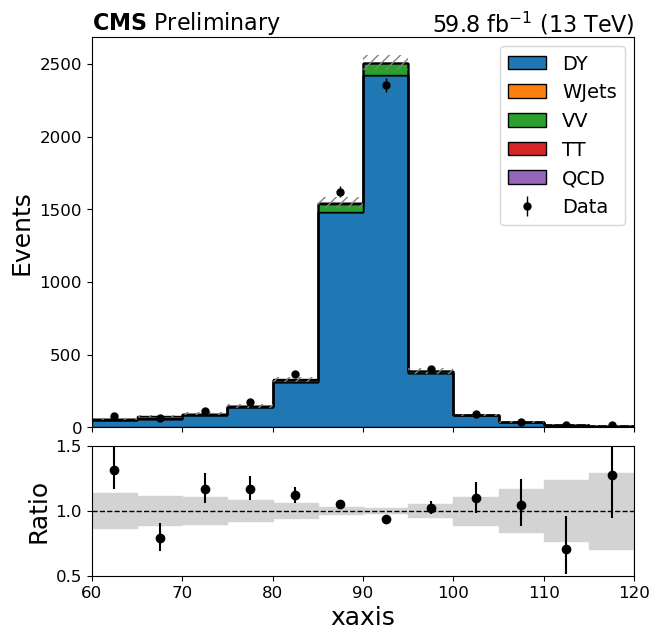

In [80]:
QCDScaleFactor = 1.6996559936491136
ss_massDict = {'DY': hists['DY']['DYJets_ss_mass'], 'WJets': hists['WJets']['WJets_ss_mass'], 'VV': hists['VV']['VV_ss_mass'], 'TT': hists['TT']['TT_ss_mass'],}
ss_Data_mass = hists['Data']['Data_ss_mass']
QCD_hist = ss_Data_mass - ss_massDict['DY'] - ss_massDict['WJets'] - ss_massDict['VV'] - ss_massDict['TT']
QCD_hist = QCD_hist * QCDScaleFactor
for index in range(0,12):
    if QCD_hist[index] < 0:
        QCD_hist[index] = 0.0

massDict = {'DY': hists['DY']['DYJets_mass'], 'WJets': hists['WJets']['WJets_mass'], 'VV': hists['VV']['VV_mass'], 'TT': hists['TT']['TT_mass'], 'QCD': QCD_hist}
massStack = hist.Stack.from_dict(massDict)
values = massDict['DY'].values() + massDict['WJets'].values() + massDict['VV'].values() + massDict['TT'].values() + QCD_hist.values()
variances = massDict['DY'].variances() + massDict['WJets'].variances() + massDict['VV'].variances() + massDict['TT'].variances() + QCD_hist.values()
massHist = plotWithRatio(massStack, hists['Data']['Data_mass'], overlay='dataset', values=values, variances=variances)

/tmp/ipykernel_2956987/2683371441.py:143: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatUp = np.append(1 + np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:144: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatDo = np.append(1 - np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:159: RuntimeWarning: invalid value encountered in divide
  ratios = hist_1_values / hist_2_values


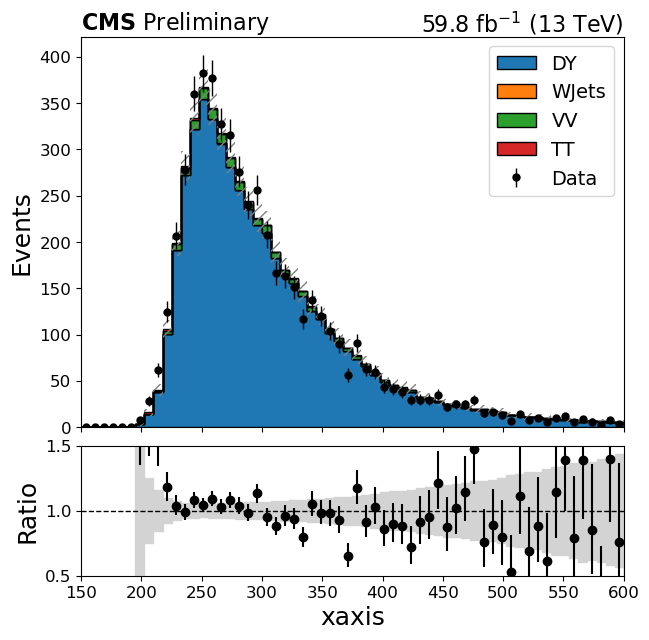

In [75]:
ptDict = {'DY': hists['DY']['pt'], 'WJets': hists['WJets']['pt'], 'VV': hists['VV']['pt'], 'TT': hists['TT']['pt'],}
ptStack = hist.Stack.from_dict(ptDict)
values = ptDict['DY'].values() + ptDict['WJets'].values() + ptDict['VV'].values() + ptDict['TT'].values()
variances = ptDict['DY'].variances() + ptDict['WJets'].variances() + ptDict['VV'].variances() + ptDict['TT'].variances()

ptHist = plotWithRatio(ptStack,  hists['Data']['pt'], overlay='dataset', values=values, variances=variances)

/tmp/ipykernel_2956987/2683371441.py:143: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatUp = np.append(1 + np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:144: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatDo = np.append(1 - np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:159: RuntimeWarning: invalid value encountered in divide
  ratios = hist_1_values / hist_2_values


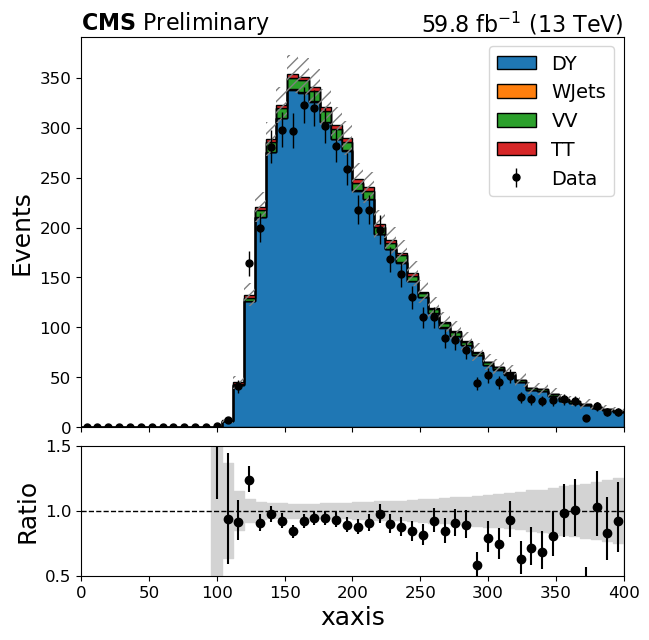

In [23]:
ptDict = {'DY': hists['DY']['muPt'], 'WJets': hists['WJets']['muPt'], 'VV': hists['VV']['muPt'], 'TT': hists['TT']['muPt'],}
ptStack = hist.Stack.from_dict(ptDict)
values = ptDict['DY'].values() + ptDict['WJets'].values() + ptDict['VV'].values() + ptDict['TT'].values()
variances = ptDict['DY'].variances() + ptDict['WJets'].variances() + ptDict['VV'].variances() + ptDict['TT'].variances()
ptHist = plotWithRatio(ptStack,  hists['Data']['muPt'], overlay='dataset', values=values, variances=variances)

/tmp/ipykernel_2956987/2683371441.py:143: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatUp = np.append(1 + np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:144: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatDo = np.append(1 - np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:159: RuntimeWarning: invalid value encountered in divide
  ratios = hist_1_values / hist_2_values


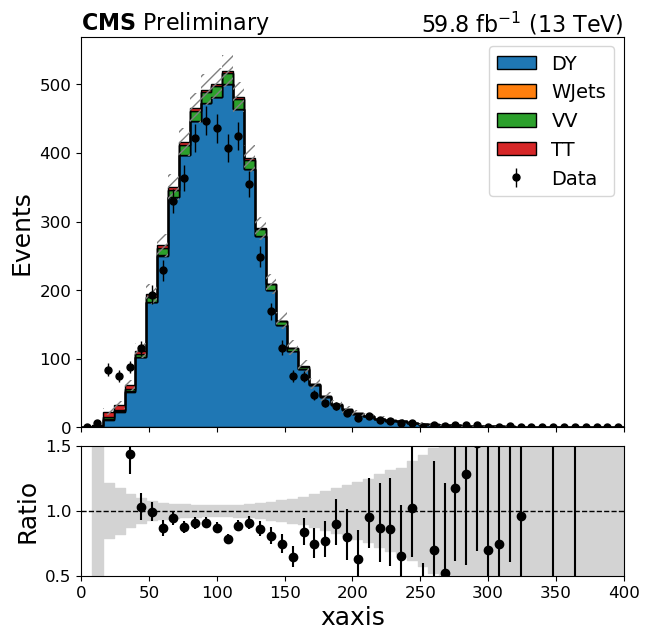

In [24]:
ptDict = {'DY': hists['DY']['subMuPt'], 'WJets': hists['WJets']['subMuPt'], 'VV': hists['VV']['subMuPt'], 'TT': hists['TT']['subMuPt'],}
ptStack = hist.Stack.from_dict(ptDict)
values = ptDict['DY'].values() + ptDict['WJets'].values() + ptDict['VV'].values() + ptDict['TT'].values()
variances = ptDict['DY'].variances() + ptDict['WJets'].variances() + ptDict['VV'].variances() + ptDict['TT'].variances()
ptHist = plotWithRatio(ptStack,  hists['Data']['subMuPt'], overlay='dataset', values=values, variances=variances)

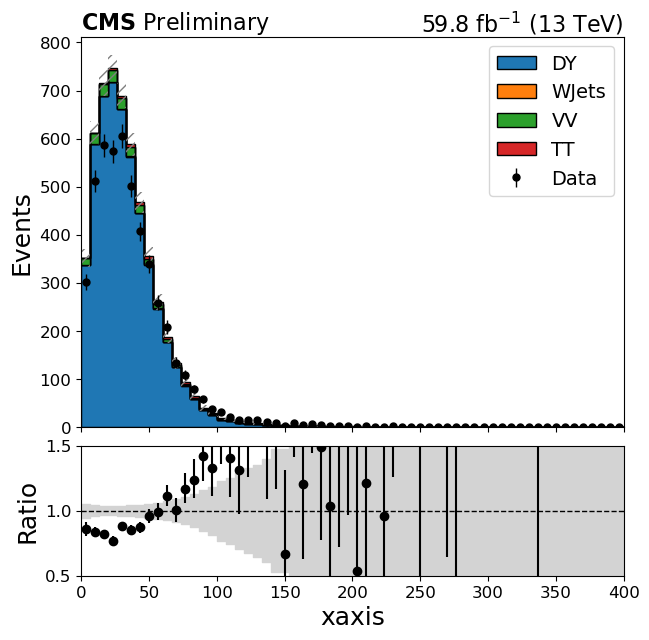

In [25]:
ptDict = {'DY': hists['DY']['MET'], 'WJets': hists['WJets']['MET'], 'VV': hists['VV']['MET'], 'TT': hists['TT']['MET'],}
ptStack = hist.Stack.from_dict(ptDict)
values = ptDict['DY'].values() + ptDict['WJets'].values() + ptDict['VV'].values() + ptDict['TT'].values()
variances = ptDict['DY'].variances() + ptDict['WJets'].variances() + ptDict['VV'].variances() + ptDict['TT'].variances()
ptHist = plotWithRatio(ptStack,  hists['Data']['MET'], overlay='dataset', values=values, variances=variances)

/tmp/ipykernel_2956987/2683371441.py:143: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatUp = np.append(1 + np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:144: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatDo = np.append(1 - np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:159: RuntimeWarning: invalid value encountered in divide
  ratios = hist_1_values / hist_2_values


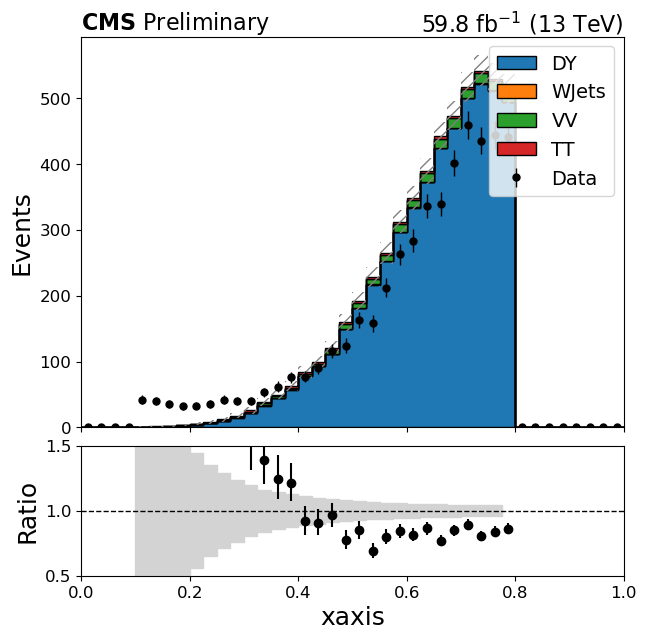

In [26]:
ptDict = {'DY': hists['DY']['dr'], 'WJets': hists['WJets']['dr'], 'VV': hists['VV']['dr'], 'TT': hists['TT']['dr'],}
ptStack = hist.Stack.from_dict(ptDict)
values = ptDict['DY'].values() + ptDict['WJets'].values() + ptDict['VV'].values() + ptDict['TT'].values()
variances = ptDict['DY'].variances() + ptDict['WJets'].variances() + ptDict['VV'].variances() + ptDict['TT'].variances()
ptHist = plotWithRatio(ptStack,  hists['Data']['dr'], overlay='dataset', values=values, variances=variances)

/tmp/ipykernel_2956987/2683371441.py:143: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatUp = np.append(1 + np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:144: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatDo = np.append(1 - np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:159: RuntimeWarning: invalid value encountered in divide
  ratios = hist_1_values / hist_2_values


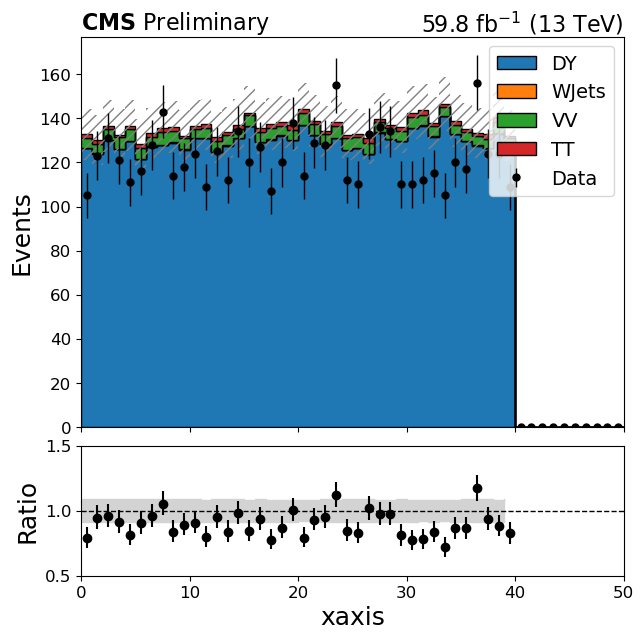

In [27]:
ptDict = {'DY': hists['DY']['tmass'], 'WJets': hists['WJets']['tmass'], 'VV': hists['VV']['tmass'], 'TT': hists['TT']['tmass'],}
ptStack = hist.Stack.from_dict(ptDict)
values = ptDict['DY'].values() + ptDict['WJets'].values() + ptDict['VV'].values() + ptDict['TT'].values()
variances = ptDict['DY'].variances() + ptDict['WJets'].variances() + ptDict['VV'].variances() + ptDict['TT'].variances()
ptHist = plotWithRatio(ptStack,  hists['Data']['tmass'], overlay='dataset', values=values, variances=variances)

/tmp/ipykernel_2956987/2683371441.py:143: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatUp = np.append(1 + np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:144: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatDo = np.append(1 - np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:159: RuntimeWarning: invalid value encountered in divide
  ratios = hist_1_values / hist_2_values


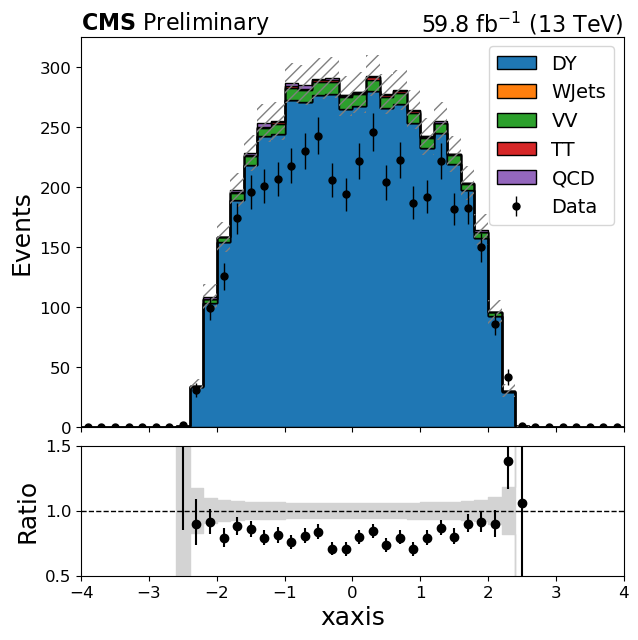

In [28]:
QCDScaleFactor = 1.6996559936491136
ss_massDict = {'DY': hists['DY']['ss_eta'], 'WJets': hists['WJets']['ss_eta'], 'VV': hists['VV']['ss_eta'], 'TT': hists['TT']['ss_eta'],}
ss_Data_mass = hists['Data']['ss_eta']
QCD_hist = ss_Data_mass - ss_massDict['DY'] - ss_massDict['WJets'] - ss_massDict['VV'] - ss_massDict['TT']
QCD_hist = QCD_hist * QCDScaleFactor
for index in range(0,12):
    if QCD_hist[index] < 0:
        QCD_hist[index] = 0.0

massDict = {'DY': hists['DY']['eta'], 'WJets': hists['WJets']['eta'], 'VV': hists['VV']['eta'], 'TT': hists['TT']['eta'], 'QCD': QCD_hist}
massStack = hist.Stack.from_dict(massDict)
values = massDict['DY'].values() + massDict['WJets'].values() + massDict['VV'].values() + massDict['TT'].values() + QCD_hist.values()
variances = massDict['DY'].variances() + massDict['WJets'].variances() + massDict['VV'].variances() + massDict['TT'].variances() + QCD_hist.values()
massHist = plotWithRatio(massStack, hists['Data']['eta'], overlay='dataset', values=values, variances=variances)

/tmp/ipykernel_2956987/2683371441.py:143: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatUp = np.append(1 + np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:144: RuntimeWarning: invalid value encountered in divide
  ratio_mcStatDo = np.append(1 - np.sqrt(variances)/values,[0])
/tmp/ipykernel_2956987/2683371441.py:159: RuntimeWarning: invalid value encountered in divide
  ratios = hist_1_values / hist_2_values


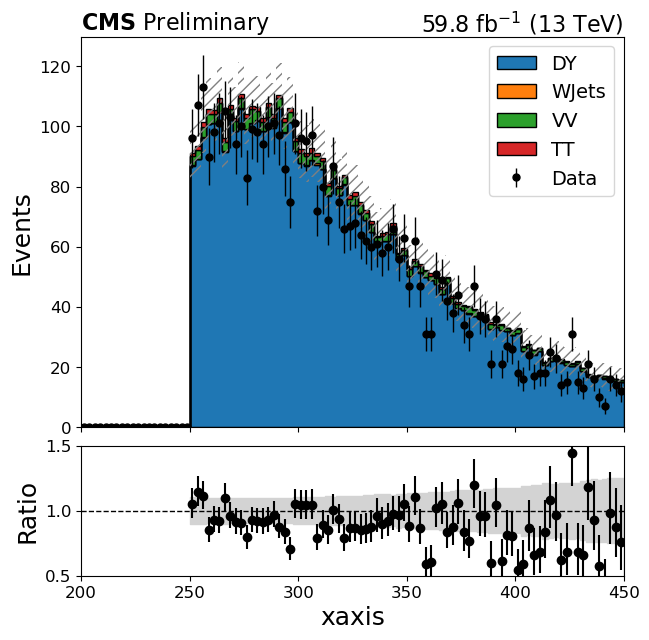

In [29]:
ptDict = {'DY': hists['DY']['HiggsPt'], 'WJets': hists['WJets']['HiggsPt'], 'VV': hists['VV']['HiggsPt'], 'TT': hists['TT']['HiggsPt'],}
ptStack = hist.Stack.from_dict(ptDict)
values = ptDict['DY'].values() + ptDict['WJets'].values() + ptDict['VV'].values() + ptDict['TT'].values()
variances = ptDict['DY'].variances() + ptDict['WJets'].variances() + ptDict['VV'].variances() + ptDict['TT'].variances()
ptHist = plotWithRatio(ptStack,  hists['Data']['HiggsPt'], overlay='dataset', values=values, variances=variances)

array([0.000000e+00, 6.343648e+06, 4.379880e+05, 4.301500e+05,
       4.288580e+05, 0.000000e+00, 3.058830e+05, 8.477700e+04,
       7.202000e+03, 6.096000e+03, 6.096000e+03, 6.096000e+03,
       6.096000e+03])

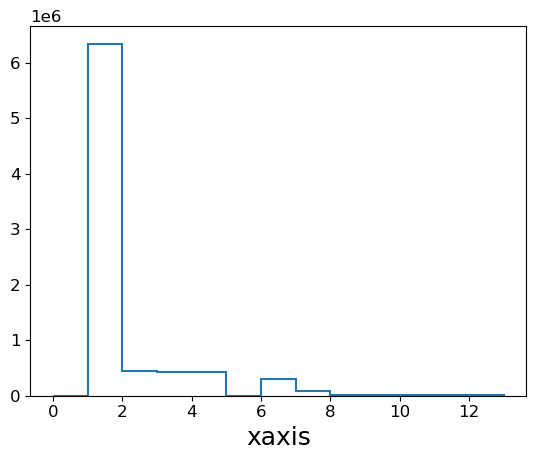

In [76]:
import mplhep

mplhep.histplot(hists['Data']['hcount'])
hists['Data']['hcount'].values()

array([     0.,      0., 437988., 430150., 428858., 336409., 239674.,
        65230.,   7292.,   6224.,      0.,      0.])

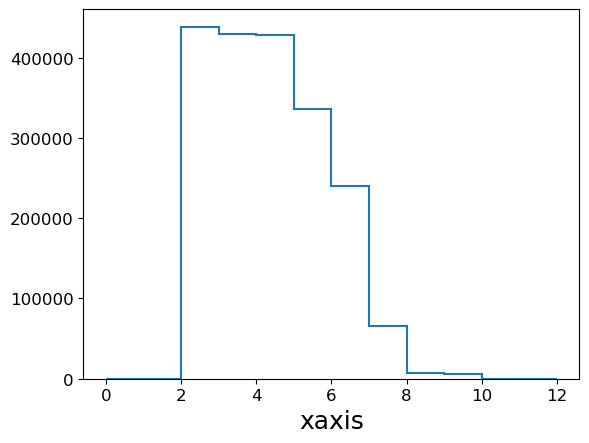

In [65]:
import mplhep

mplhep.histplot(hists['Data']['hcount'])
hists['Data']['hcount'].values()